In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Load and visualize dataset

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


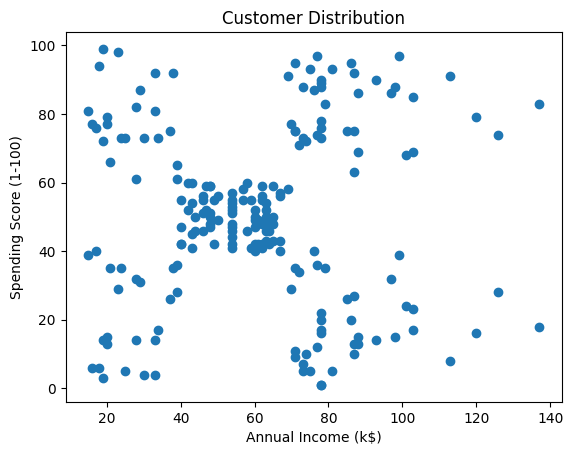

In [10]:
plt.scatter(data["Annual Income (k$)"], data["Spending Score (1-100)"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Distribution")
plt.show()


# FItting K-Means and finding the optimal K

In [4]:
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]


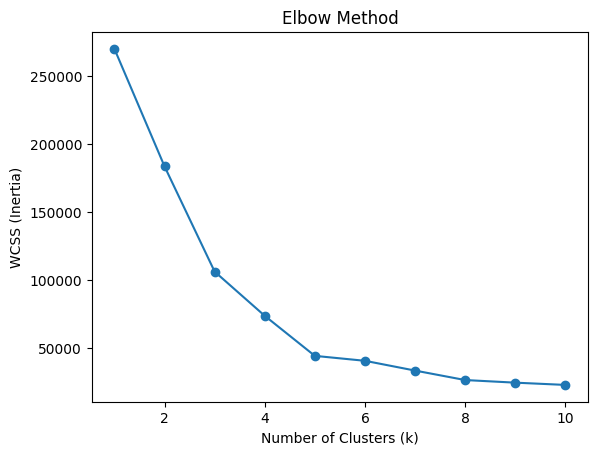

In [5]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method")
plt.show()


In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(X)


# Visualize clustering with color code

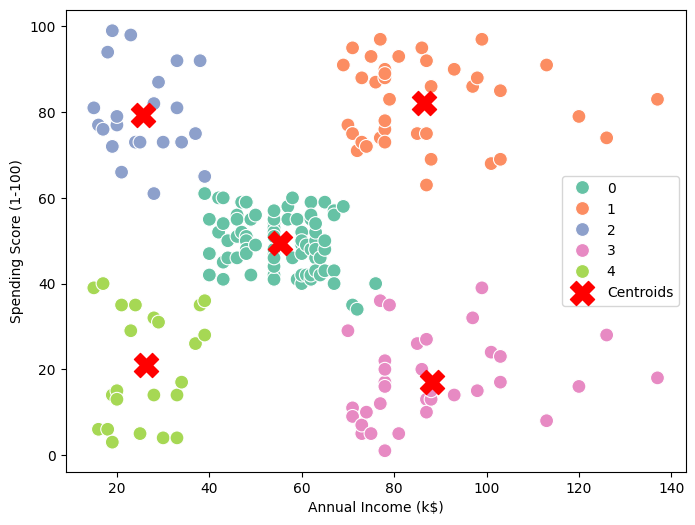

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",
                hue="Cluster", palette="Set2", data=data, s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c="red", marker="X", label="Centroids")
plt.legend()
plt.show()


# for feartures>2 (using PCA)

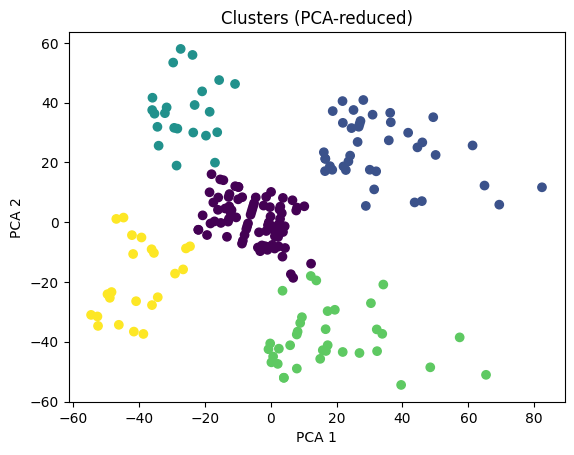

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=data["Cluster"], cmap="viridis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters (PCA-reduced)")
plt.show()


# Evaluating clustering

In [9]:
score = silhouette_score(X, data["Cluster"])
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648
